In [1]:
# -*- coding: utf-8 -*-

# чтобы запустить это на своем компьютере, нужно поставить jupyter notebook и python3, например из anaconda:
# http://jupyter.readthedocs.io/en/latest/install.html#id3
# и несколько питонячьих модулей: pip3 install numpy pandas matplotlib

In [2]:
#csvfile_path = '/Users/serratus/Downloads/Ни шиша - все вместе.csv'  # данные мы берём из локального файла. 
#csvfile_path = "https://pastebin.com/raw/6HnQ772y" # можно и по-другому, из сети.
csvfile_path = "https://pastebin.com/raw/aECMpraM" # версия от пятнадцатого мая

import numpy as np # для численных операций и NaN.
import pandas # для хранения, представления, фильтрации данных
import matplotlib.pyplot as plt # для картинок
data = pandas.read_csv(csvfile_path)# считаем содержимое файла в датафрейм. Это такая умная таблица. См. http://pandas.pydata.org/pandas-docs/stable/10min.html, https://medium.com/@kacawi/tutorial-pandas-data-structures-736ded97842 

In [3]:
# надо почистить данные, избавляясь от маргинальных значений, чтобы не спотыкаться о них при работе

# поправим даты, чтобы они были в одном формате и чтобы с ними можно было обращаться будто с числами
data['date_'] = data['date'].map(lambda s: 2020 if s == "2000+" else s) # записи, помеченные 2000+  превращаются в 2000. 
data.set_value(30, 'date_',2001) # в тридцатой строке у нас встречается неформатная дата, поправим её вручную.
data['date_'] = pandas.to_numeric(data['date_'])
data['date_'] = data['date_'].fillna(1840) # примеры с неизвестной датой мы метим 1840-м годом. можно будет отрезать начало списка, когда мы рисуем график

data['semantics+_'] = data['semantics+'].fillna('чёрт его знает') # можно использовать особое значение
#                                                                   но пока мы
#data['semantics+_'] = data['semantics+'].fillna('')              # примеры с непроставленным типом метим пустой строкой.


years = sorted(list(data['date_'].unique())) 
semantic_types = data['semantics+_'].unique()
# мы будем пользоваться перечнями семантических типов и лет в дальнейшем,
# удобно рассчитать их однажды и сохранить в отдельные переменные

In [4]:
data

,left context,left context highlight,n,right context,right context highlight,source,date,predicat position,predicat,extra,posession semantics,semantics+,tense,person,number,form,why not interchangable with ничего,date_,semantics+_
0,Флаг,NaN,ни шиша,"не видно, но похоже итало-грек ""Георгиос Авер...",видно,vk.com,2014,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,совсем,2014.0,воспринимать
1,"BlueSky, Gelish белый на нем микроблеск/зеркал...",NaN,ни шиша,не видно =(,видно,vk.com,2014,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,совсем,2014.0,воспринимать
2,Только я на свет родился не успели меня в пеле...,NaN,ни шиша,не видит.,видит,"Рэй Брэдбери, Лев Жданов. Отпрыск Макгиллахи",1955,r,видеть,NaN,NaN,воспринимать,present,3.0,1.0,NaN,NaN,1955.0,воспринимать
3,"У Гриши с Иваном враз заложило уши. Кричи, не ...",NaN,ни шиша,не слышно.,слышно,Нева: орган Союза советских писателей СССР.,1978,r,слышно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,NaN,1978.0,воспринимать
4,Ничего я хорошего не вижу в нашем районе.,[вижу],Ни шиша,. Вот так...,NaN,Вчера и сегодня. Вчера и сегодня: критико-публ...,1986,l0,[видеть],NaN,NaN,воспринимать,present,1.0,1.0,NaN,NaN,1986.0,воспринимать
5,"Такой сплошной снег был весь день, что не видно",видно,ни шиша,": ни руин, ни домов, ни деревьев ― так, унылые...",NaN,Андрей Дмитриев. Голубев,1988,l,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,NaN,1988.0,воспринимать
6,"Во-вторых, не шибко уповай и на науку ― ты же ...",NaN,ни шиша,"не видно, но и никогда, ни прикаких условиях н...",видно,Я. Е. Харон. Злые песни Гийома дю Вентре (1965...,1989,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,NaN,1989.0,воспринимать
7,"Даже из шушенского шалаша скажешь: шалишь, не ...",видал,ни шиша,!,NaN,Встреча: выпуски 31-42,1996,l,видать,NaN,NaN,воспринимать,past,NaN,1.0,m,NaN,1996.0,воспринимать
8,"Против закатного солнца, которое опять, так не...",NaN,ни шиша,не вижу.,вижу,3dway.ru,2006,r,вилеть,NaN,NaN,воспринимать,present,1.0,1.0,NaN,NaN,2006.0,воспринимать
9,"О л е г. Ты знаешь, мы же не глухонемые! Даже ...",NaN,ни шиша,не слышат! Но как-то договариваются. Без слов...,слышат,Николай Якимчук. По дороге в Канны,2008,r,слышать,NaN,NaN,воспринимать,present,3.0,2.0,NaN,NaN,2008.0,воспринимать


In [5]:
# посмотреть, что получилось
# print(semantic_types, years)

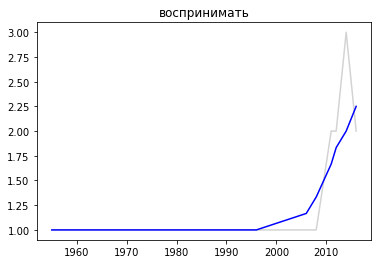

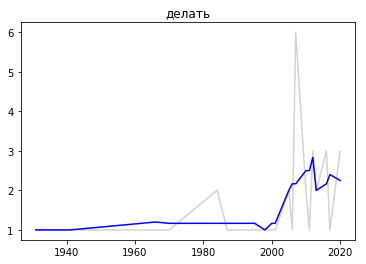

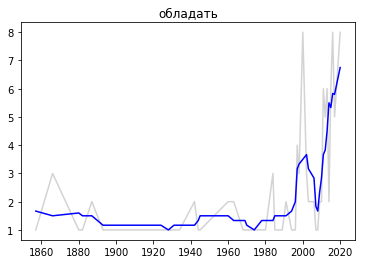

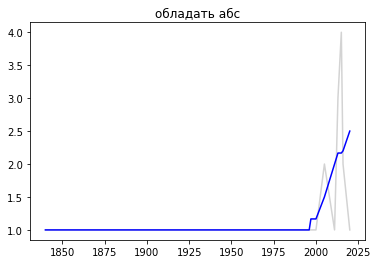

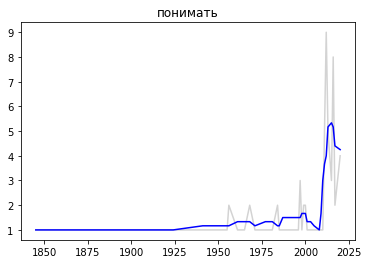

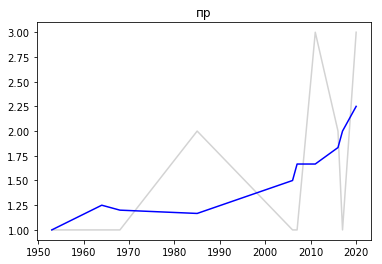

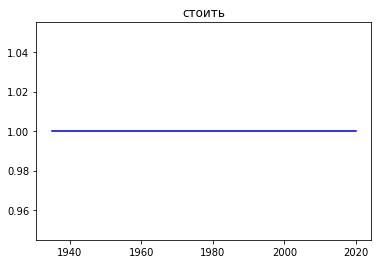

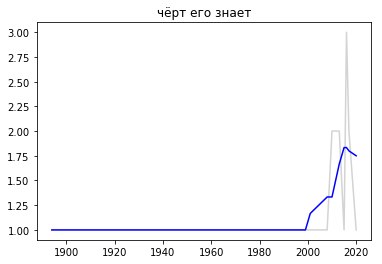

In [6]:
from collections import Counter
# Построим сглаженные графики.

def smooth_list(xs, smoothing_level=3):
    ys = [0]*len(xs)
    for idx, x in enumerate(xs):
        slice_ = xs[max(idx-smoothing_level,0):(min(idx+smoothing_level,len(xs)))]
        ys[idx] = sum(slice_)/len(slice_)*1.0
    return(ys)
#    print(xs, ys, len(xs), len(ys))


for t in semantic_types:
    slice_ = sorted(data[data['semantics+_']==t]['date_'])
    cnt = Counter(slice_)
    xs = list(cnt.keys())
    ys = (list(cnt.values()))
    ysmooth = smooth_list(list(cnt.values()))
#     print(list(cnt.items()))
#    plt.plot(xs, [y+sum(ys[idx:idx+2])/5 for y, idx in enumerate(ys)])
#    plt.plot(xs, smooth_list(ys))
    plt.plot(xs, ys, color='lightgray')
    plt.plot(xs, ysmooth, color='b')
    plt.title(t)
    plt.show()


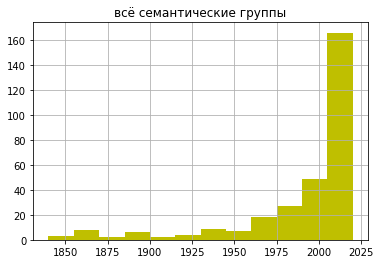

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


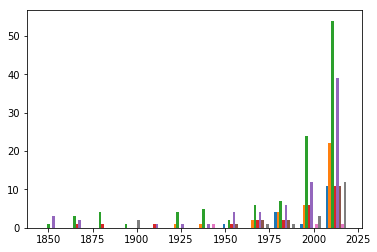

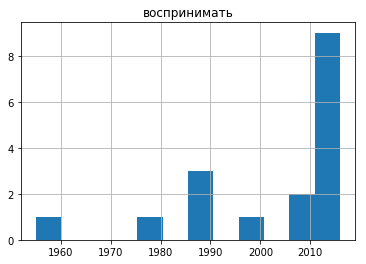

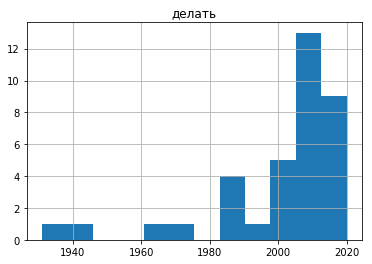

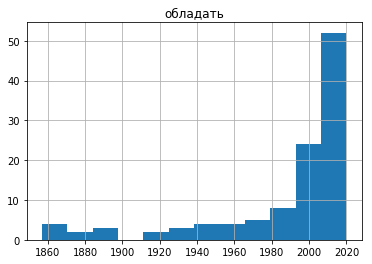

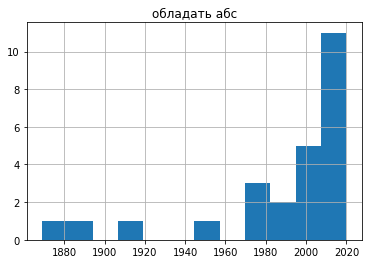

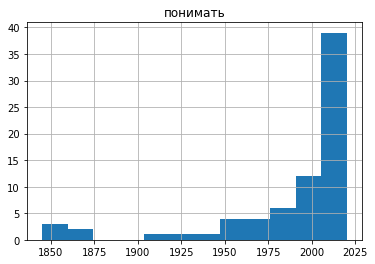

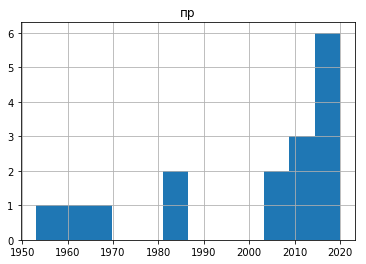

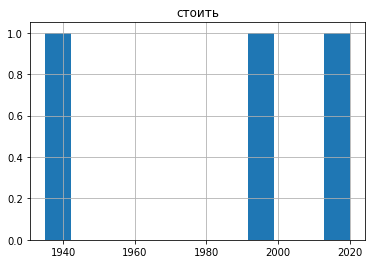

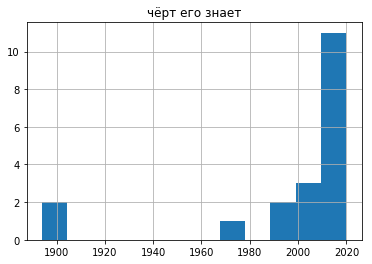

In [7]:
# здесь мы нарисуем гисторамму, положив каждый год в одну из n_bins групп
n_bins = 12
data['date_'].hist(bins=n_bins, color='y') # нарисовать гистограмму (на невидимом холсте)
plt.title('всё семантические группы') # добавить подпись к графику
plt.show() # вывести график

ts = []
for t in semantic_types:
    ts.append(                                     # добавить в список новый элемент, который получится,
        data[                                      # если взять наши данные,
            data['semantics+_']==t]                # те из них, где семантический тип соответствует тому, который мы сейчас ищем (мы в цикле ищем все по-очереди)
            ['date_'][1844 <= data['date_']])      # а из них — те, где год больше 1844-го (все примеры с пропущенным годом мы пометили 1840-м на этапе предобработки данных, то есть тут мы такие примеры отсеиваем)
plt.hist(ts, bins=n_bins)                          # нарисуй гистограмму текущего состояния списка.
    
# то же самое, но чуть короче:
for t in semantic_types:
    data[['date_', 'semantics+_']][data['semantics+_']==t][1844 <= data['date_']].hist(bins=n_bins)
    plt.title(t)
    plt.show()
    

In [8]:
# # Данные хранятся в странном формате. Как им пользоваться? Как посмотреть, как выглядят наши данные?
# # так можно вывести верхние несколько строк таблицы:
data.head(5)

,left context,left context highlight,n,right context,right context highlight,source,date,predicat position,predicat,extra,posession semantics,semantics+,tense,person,number,form,why not interchangable with ничего,date_,semantics+_
0,Флаг,NaN,ни шиша,"не видно, но похоже итало-грек ""Георгиос Авер...",видно,vk.com,2014,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,совсем,2014.0,воспринимать
1,"BlueSky, Gelish белый на нем микроблеск/зеркал...",NaN,ни шиша,не видно =(,видно,vk.com,2014,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,совсем,2014.0,воспринимать
2,Только я на свет родился не успели меня в пеле...,NaN,ни шиша,не видит.,видит,"Рэй Брэдбери, Лев Жданов. Отпрыск Макгиллахи",1955,r,видеть,NaN,NaN,воспринимать,present,3.0,1.0,NaN,NaN,1955.0,воспринимать
3,"У Гриши с Иваном враз заложило уши. Кричи, не ...",NaN,ни шиша,не слышно.,слышно,Нева: орган Союза советских писателей СССР.,1978,r,слышно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,NaN,1978.0,воспринимать
4,Ничего я хорошего не вижу в нашем районе.,[вижу],Ни шиша,. Вот так...,NaN,Вчера и сегодня. Вчера и сегодня: критико-публ...,1986,l0,[видеть],NaN,NaN,воспринимать,present,1.0,1.0,NaN,NaN,1986.0,воспринимать


In [9]:
# # вывести все строчки, где в столбце "semantics+" есть пустое значение, 
# # то есть все примеры с неразмеченным семантическим классом
data[pandas.isnull(data['semantics+'])]



,left context,left context highlight,n,right context,right context highlight,source,date,predicat position,predicat,extra,posession semantics,semantics+,tense,person,number,form,why not interchangable with ничего,date_,semantics+_
282,"Положение наше было крайне досадное, потому чт...","[бьёт], ему",ни шиша,", видишь его, да ничем не достанешь"".",NaN,Э. Любарский. Бедственная экспедиция // «Истор...,1894,l0,[бьёт],ему,NaN,NaN,present,3.0,1.0,NaN,NaN,1894.0,чёрт его знает
283,"― А что же, он теперь открыл что-нибудь,",[открыл],ни шиша,.,NaN,В. П. Мещерский. Мои воспоминания,1897,l0,[открыл],NaN,NaN,NaN,past,3.0,1.0,m,NaN,1897.0,чёрт его знает
284,"Которое кое-что значит для того, кто его носит...",[значит],ни шиша,.,NaN,Иностранная литература: выпуски 1-4.,1998,l0,[значит],NaN,NaN,NaN,present,3.0,1.0,NaN,NaN,1998.0,чёрт его знает
285,"кто сказал, что он тестер?..",NaN,ни шиша,"подобного - он кинутый юзверь, выложивший свою...",подобного,livejournal.com,2008,0,NaN,подобного,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,чёрт его знает
286,прикол в том что в первый раз я несколько раз ...,[появилось],ни шиша,NaN,NaN,vk.com,2010,l0,[появиться],NaN,NaN,NaN,past,3.0,1.0,n,NaN,2010.0,чёрт его знает
287,"Юмор в нем искрил, многие ждали каждый новый в...",[смотри],ни шиша,.,NaN,vk.com,2013,l0,[смотрить],NaN,NaN,NaN,NaN,2.0,1.0,imp,NaN,2013.0,чёрт его знает
288,Второй день Нобелевской Недели - и опять,NaN,ни шиша,.,NaN,livejournal.com,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,чёрт его знает
289,"Успокойтесь, были бы вы красавчик, а то в 30 лет",NaN,ни шиша,.,NaN,vk.com,2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,чёрт его знает
290,Да смотрел я там но не выпадают я 10 волн на п...,NaN,ни шиша,.,NaN,vk.com,2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,чёрт его знает
291,"Николя, не в силах изречь",в силах изречь,ни шиша,",тянулся за бароном как бы влекомый силой гипн...",NaN,Василий Аксенов. Вольтерьянцы и вольтерьянки,2016,l0,[быть не в силах изречь],NaN,NaN,NaN,past,3.0,1.0,transgress,NaN,2016.0,чёрт его знает


In [10]:
# # Как посмотреть на наши данные? Как итерироваться по примерам в цикле?

# # Вот так можно взять каждую строчку (между третьей и шестой) как кортеж (tuple):
for r in data[3:6].itertuples():
    print(r, "\n", r[10])
    

# # Взять каждую строчку (между третьей и шестой) как объект типа Pandas.Series:    
for r in data[3:6].iterrows():
    print(r, "\n")    
    

Pandas(Index=3, _1='У Гриши с Иваном враз заложило уши. Кричи, не кричи', _2=nan, n='ни шиша', _4='не слышно.', _5='слышно', source='Нева: орган Союза советских писателей СССР.', date='1978', _8='r', predicat='слышно', extra=nan, _11=nan, _12='воспринимать', tense='present', person=nan, number=nan, form='adverb', _17=nan, date_=1978.0, _19='воспринимать') 
 nan
Pandas(Index=4, _1='Ничего я хорошего не вижу в нашем районе.', _2='[вижу]', n='Ни шиша', _4='. Вот так...', _5=nan, source='Вчера и сегодня. Вчера и сегодня: критико-публицистические сюжеты', date='1986', _8='l0', predicat='[видеть]', extra=nan, _11=nan, _12='воспринимать', tense='present', person=1.0, number=1.0, form=nan, _17=nan, date_=1986.0, _19='воспринимать') 
 nan
Pandas(Index=5, _1='Такой сплошной снег был весь день, что не видно', _2='видно', n='ни шиша', _4=': ни руин, ни домов, ни деревьев ― так, унылые тени какие-то, фигурки…', _5=nan, source='Андрей Дмитриев. Голубев', date='1988', _8='l', predicat='видно', extra=

In [11]:
# Можно представлять данные по-другому:

# a dict of dicts
years = data['date_'].unique()
years_dict = dict((lambda l: [(x, 0) for x in l])(data['date_'].unique()))
types_x_years_dict = dict((lambda l: [(x, years_dict.copy()) for x in l])(data['semantics+_'].unique()))
#types_x_years_dict

In [12]:
# an ndarray
years = data['date_'].unique()
years_x_types_ndarray = np.zeros(shape=(len(years),len(semantic_types)))
years_x_types_ndarray.shape
years_x_types_ndarray[0,0] 
years_ndarray = np.zeros(shape=(len(years)))
years_ndarray

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [13]:
# # # # #

In [14]:
#data.fillna('NaN') # turn numpy.nan into a string wherever it occurs
#pandas.DataFrame() #how do I make a new dataframe with columns from types and rows from years?
for t in data['semantics+_'].unique():
    for r in data[data['semantics+_']==t].itertuples(): # data['semantics+_']==t делает маску, внешняя data[...] этой маской выбирает нужные строки, а itertuples() позволяет брать строки по одной, итерируясь по датафрейму как по списку collections.namedtuple, а просто так по датафрейму итерироваться нельзя 

        y = r.date_
        types_x_years_dict[t][y] += 1
        years_dict[y] += 1
#        print(r)

In [15]:
# Галка, [27 Apr 2017, 0:41]:
# 1. отрисовать частотность по годам от всей выборки за опр. период, например 15 лет или просто частотность на худой конец
#   1. Собираем даты по типам:
#     Для каждого семантического типа:
years = data['date_'].unique()
year_nums=dict(zip(years,range(len(years))))
type_nums=dict(zip(semantic_types,range(len(semantic_types)))) # иногда нам нужны не только элементы списка, но и номера их в списке.
type_nums_=enumerate(semantic_types) # можно их получить с помощью встроенной функции enumerate. Она из списка элементов делает итератор пар (номер, элемент). Итератор — это такой ленивый список, которые выдает свои элементы по-одному, а не все скопом. Его можно использовать в конструкции for (idx, elem) in iterator:...
print(
    list(type_nums.items()),
    "\n\n",
    list(type_nums_) )


[('воспринимать', 0), ('делать', 1), ('обладать', 2), ('обладать абс', 3), ('понимать', 4), ('пр', 5), ('стоить', 6), ('чёрт его знает', 7)] 

 [(0, 'воспринимать'), (1, 'делать'), (2, 'обладать'), (3, 'обладать абс'), (4, 'понимать'), (5, 'пр'), (6, 'стоить'), (7, 'чёрт его знает')]


In [16]:
print(type_nums)
#types_by_year = map(lambda y: (y, 0))
#types_x_years = dict(data['semantics+_'].unique())
#FIXME: data.fillna('NaN') # turn numpy.nan into a string wherever it occurs



{'воспринимать': 0, 'делать': 1, 'обладать': 2, 'обладать абс': 3, 'понимать': 4, 'пр': 5, 'стоить': 6, 'чёрт его знает': 7}


In [17]:
pandas.DataFrame() #how do I make a new dataframe with columns from types and rows from years?
for t in data['semantics+_'].unique():
#       Для примера этого семантического типа:
    for r in data[data['semantics+_']==t].itertuples(): # data['semantics+_']==t делает маску, внешняя data[...] этой маской выбирает нужные строки, а itertuples() позволяет брать строки по одной, итерируясь по датафрейму как по списку collections.namedtuple, а просто так по датафрейму итерироваться нельзя 
        y = r.date_
#         Если такая дата есть в списке дат этого листа:
                # I could do it with a list of lists, with a dict, with a ndarray or with a dataframe.
                # let me try a dict of dicts:
#           значение даты += 1
#           значение даты в общем списке дат += 1
        tn = type_nums[t]
        yn = year_nums[y]
        years_x_types_ndarray[yn][tn] += 1
        years_ndarray[yn] += 1
  

In [18]:
#        print(t, y, years_x_types_ndarray[yn][tn])
#    print('='*80)
#    print(years,years_ndarray)
      

In [19]:

#         Если такой даты нет в списке дат этого листа:
#           добавить дату в список, приравняв её значение одному
#           Если такой даты нет в общем списке дат:
#             добавить дату в список, приравняв её значение одному

#   2. Нарисовать график:
#     По одной оси -   года, по другой - число примеров
#     График отдельного цвета/рисунка для каждой семантической группы (кроме стоить - она очень маленькая)



In [20]:
# nope, can't plot a dict of dicts.
# let's turn it into a list of lists first, then an numpy.n-dimensional array:

list_of_lists = []
possible_types = types_x_years_dict.keys()

books_array = np.array(list_of_lists)

types_x_years_ndarray = np.array(types_x_years_dict)

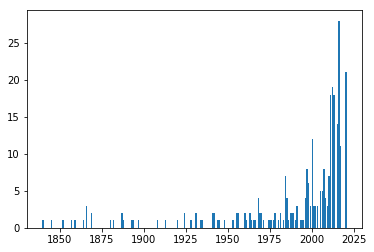

array([ 2014.,  1955.,  1978.,  1986.,  1988.,  1989.,  1996.,  2006.,
        2008.,  2011.,  2012.,  2016.,  1987.,  1931.,  1941.,  1998.,
        2005.,  1966.,  1970.,  1984.,  1995.,  2000.,  2001.,  2007.,
        2010.,  2013.,  2017.,  2020.,  1857.,  1866.,  1880.,  1887.,
        1893.,  1920.,  1924.,  1928.,  1934.,  1942.,  1944.,  1945.,
        1960.,  1963.,  1968.,  1969.,  1974.,  1980.,  1882.,  1985.,
        1997.,  1991.,  1994.,  2015.,  2002.,  2003.,  2009.,  1869.,
        1888.,  1948.,  1975.,  1976.,  1981.,  1908.,  1983.,  1840.,
        1845.,  1852.,  1859.,  1864.,  1913.,  1956.,  1961.,  1965.,
        1971.,  1977.,  1999.,  1953.,  1964.,  1935.,  1993.,  1894.,
        1897.,  1990.])

In [21]:
plt.bar(years[1:],years_ndarray[1:])
plt.show()
years

In [22]:
# 2. посчитать частотность каждой семантческой группы (без предиката - не семантическая) внутри всей выборки - pie chart. Отрисовать её частотность по годам.
#   1. Для каждого примера:
# for r in data[:2].iterrows():# iterate through rows
#     print(r, type(r), r.index(0), r)
#     Если тип есть в списке типов:
#       значение типа += 1
#     Если типа нет в списке типов:
#       добавить тип в список, приравняв его значение 1
from collections import Counter
semantic_type_freqs = Counter(data['semantics+']) # slice data across the semantics field
#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       процент этой семантической группы = значение семантической группы/общее число примеров*100%
#   3. Рисуем pie chart с соответствующими процентами, легендой

total = sum(list(semantic_type_freqs.values()))
semantic_type_percentages = list(map((lambda count: count/total*100), list(semantic_type_freqs.values())))
labels_w_percentages = [str(t)+ " " + ('%.1f' % p) + "%" for (t, p) in zip(semantic_type_freqs.keys(),semantic_type_percentages)]
labels_w_absolute_counts = [str(t)+ " " + str(c) for (t, c) in zip(semantic_type_freqs.keys(), semantic_type_freqs.values())]

In [23]:
labels_w_absolute_counts

['воспринимать 17',
 'делать 36',
 'обладать 111',
 'обладать абс 26',
 'понимать 73',
 'пр 16',
 'стоить 3',
 'nan 19']

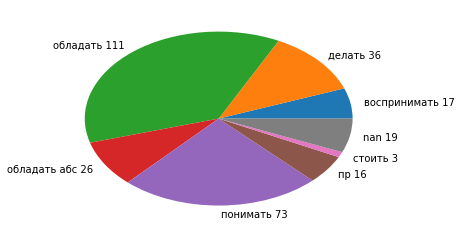

In [24]:

plt.pie([float(v) for v in semantic_type_freqs.values()], labels=labels_w_absolute_counts,
           autopct=None)
plt.show()

In [25]:
# import cufflinks
# pie=cufflinks.datagen.pie()

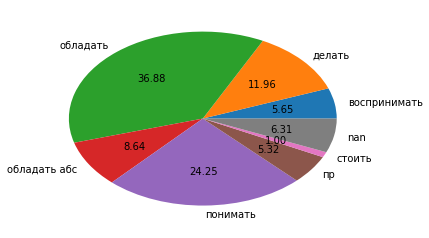

In [26]:
plt.pie([float(v) for v in semantic_type_freqs.values()], labels=list(semantic_type_freqs.keys()),
           autopct='%.2f')
plt.show()

In [27]:
data.head()

,left context,left context highlight,n,right context,right context highlight,source,date,predicat position,predicat,extra,posession semantics,semantics+,tense,person,number,form,why not interchangable with ничего,date_,semantics+_
0,Флаг,NaN,ни шиша,"не видно, но похоже итало-грек ""Георгиос Авер...",видно,vk.com,2014,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,совсем,2014.0,воспринимать
1,"BlueSky, Gelish белый на нем микроблеск/зеркал...",NaN,ни шиша,не видно =(,видно,vk.com,2014,r,видно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,совсем,2014.0,воспринимать
2,Только я на свет родился не успели меня в пеле...,NaN,ни шиша,не видит.,видит,"Рэй Брэдбери, Лев Жданов. Отпрыск Макгиллахи",1955,r,видеть,NaN,NaN,воспринимать,present,3.0,1.0,NaN,NaN,1955.0,воспринимать
3,"У Гриши с Иваном враз заложило уши. Кричи, не ...",NaN,ни шиша,не слышно.,слышно,Нева: орган Союза советских писателей СССР.,1978,r,слышно,NaN,NaN,воспринимать,present,NaN,NaN,adverb,NaN,1978.0,воспринимать
4,Ничего я хорошего не вижу в нашем районе.,[вижу],Ни шиша,. Вот так...,NaN,Вчера и сегодня. Вчера и сегодня: критико-публ...,1986,l0,[видеть],NaN,NaN,воспринимать,present,1.0,1.0,NaN,NaN,1986.0,воспринимать


In [28]:
# 3. посчитать частотность l, r, l0, ambi, 0 всего и внутри каждой семантической группы. можно отрисовать по годам - всего
#   1. Собираем позицию предиката по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
#         Если такая позиция есть в списке позиций этого листа:
#           значение позиции += 1
#         Если такой позиции нет в списке позиций этого листа:
#           добавить позицию в список, приравняв её значение 1
dict_of_predicate_position_counters_by_type = {}
for t in semantic_types:
    dict_of_predicate_position_counters_by_type[t] = []
#    for r in data[data['semantics+']==t].itertuples():
    dict_of_predicate_position_counters_by_type[t] = Counter(data[data['semantics+']==t]['predicat position'])
    print(t, dict_of_predicate_position_counters_by_type[t])

#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       процент этой семантической группы = значение семантической группы/общее число примеров*100%

#  N.B.: нам не надо считать проценты вручную, потому что функция отрисовки pie chart уже умеет это делать.
# dict_of_position_percentages_by_type = {}
# for (t, counter) in dict_of_predicate_position_counters_by_type.items():
#     total = sum(counter.values())
#     dict_of_position_percentages_by_type[t] = [counter[pos]/total*100 for pos in counter.keys()]
    


воспринимать Counter({'r': 10, 'l': 6, 'l0': 1})
делать Counter({'r': 27, 'l': 9})
обладать Counter({'r': 46, 'l': 34, '0': 28, 'l0': 2, 'r+ambi': 1})
обладать абс Counter({'0': 10, 'l': 9, 'r': 6, nan: 1})
понимать Counter({'r': 47, 'l': 21, 'l0': 2, '0': 1, 'rr': 1, 'ambi': 1})
пр Counter({'r': 11, 'l': 3, '0': 1, 'l0': 1})
стоить Counter({'ambi': 3})
чёрт его знает Counter()


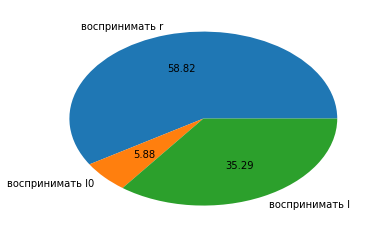

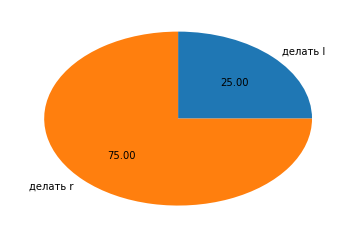

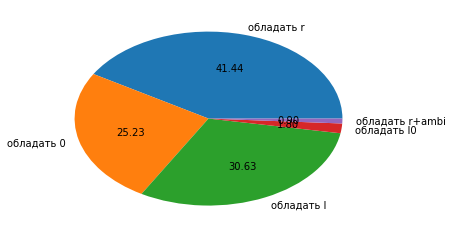

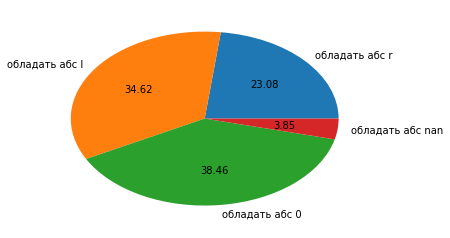

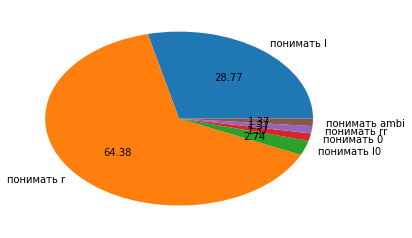

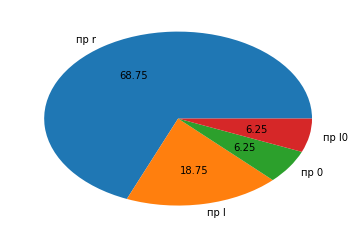

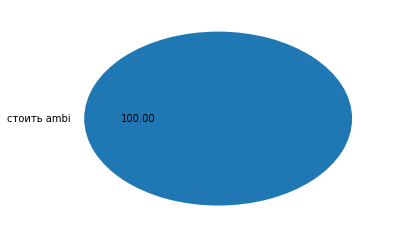

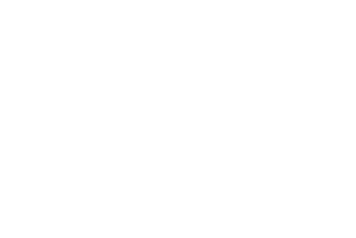

In [29]:
for (t, counter) in dict_of_predicate_position_counters_by_type.items():
    plt.pie([percentage for percentage in counter.values()],labels=[t + " " + str(position) for position in counter.keys()], autopct='%.2f')
    plt.show()

In [30]:
r[18]

2017.0

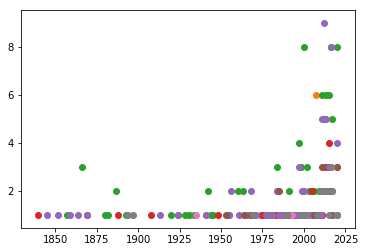

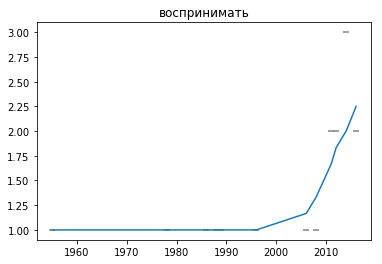

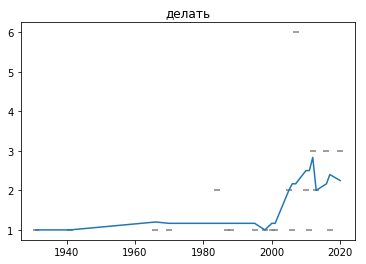

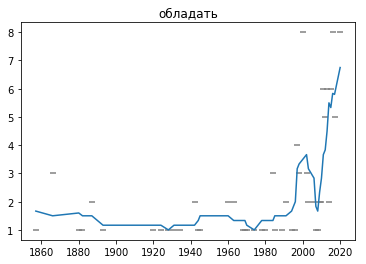

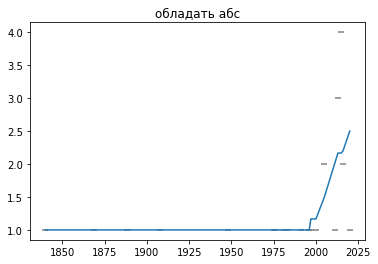

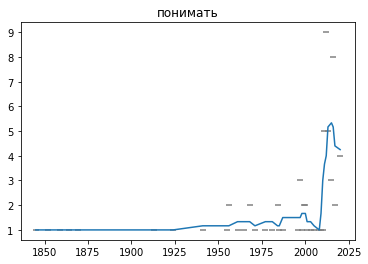

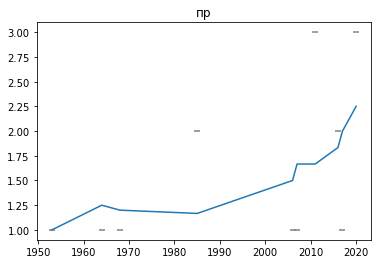

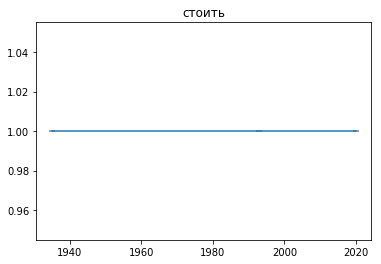

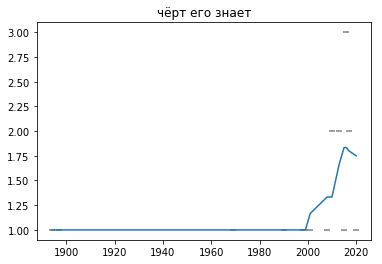

In [31]:


#   3. Рисуем pie chart с соответствующими процентами, легендой
#   4. Собираем даты позиций по типам:
#    Для каждого семантического типа:
#      Для каждой даты:
#        Для каждой позиции этого семантического типа:
#          Для каждого примера с этой датой:
#            Если пример с этой позициией:
#              Значение этой позиции для этой даты += 1
dict_of_date_counters_by_type = {}
for t in semantic_types:
#     print(t)
    date_counter = Counter()
    for r in data[data['semantics+_']==t].itertuples():
        # Counter class handles null counts gracefully.
        year = r[18]
        date_counter[year] += 1
#         print('*'*date_counter[year], year) 
    dict_of_date_counters_by_type[t] = date_counter
#   5. Нарисовать график:
#     По одной оси -   года, по другой - число примеров
#     График отдельного цвета/рисунка для каждой позиции группы (кроме стоить - она очень маленькая)
#     Отдельный график для каждой семантической группы
for idx, t in enumerate(semantic_types):
    counter = dict_of_date_counters_by_type[t]
    plt.scatter(list(counter.keys()), [int(n) for n in counter.values()])
#    plt.text(y=idx, s=t, x=0)

plt.show()


# Либо так, на отдельных холстах
for t in semantic_types:
    
    counter = dict_of_date_counters_by_type[t]
    cnts = sorted(list(counter.items()))
    xs = [x for (x, y) in cnts]
    ys = [y for (x, y) in cnts]
    plt.scatter(list(counter.keys()), [int(n) for n in counter.values()], marker="_", color='gray')
    plt.plot(xs, smooth_list(ys))
    plt.title(t)
    plt.show()
    

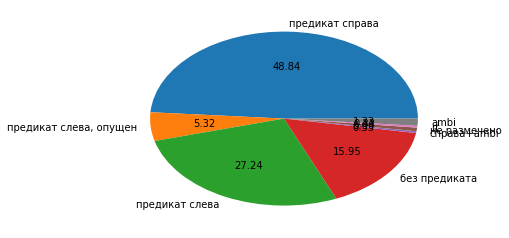

Counter({'r': 147,
         'l0': 16,
         'l': 82,
         '0': 48,
         'r+ambi': 1,
         nan: 2,
         'rr': 1,
         'ambi': 4})

In [32]:
predpos_counter = Counter(data['predicat position'])
predpos_names=["предикат справа","предикат слева, опущен", "предикат слева", "без предиката", "справа+ambi", "не размечено", "rr", "ambi"]
plt.pie(list(predpos_counter.values()), labels=predpos_names, autopct='%0.2f')
plt.show()
predpos_counter

In [33]:

# Оч неэффективно

# Оч некрасиво

# Я засыпун

# # !, [27 Apr 2017, 1:16]:
# ну и засыпай

# меня тоже рубит
# Галка, [27 Apr 2017, 1:16]:
# 4. посчитать частотность предикатов внутри групп, вывести топ 3 или топ 5
#   1. Собираем даты по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
dict_of_predicate_counts_by_type = {}
for t in semantic_types:
    c = Counter(data[data['semantics+_']==t]['predicat'])  # ой, надо почистить список возможных предикатов от NaN!
#         Если такой предикат есть в списке предикатов этого листа:
#           значение предиката += 1
#           значение предиката в общем списке дат += 1
#         Если такого предиката нет в списке предикатов этого листа:
#           добавить предикат в список, приравняв его значение 1
#           Если такого предиката нет в общем списке предикатов:
#             добавить предикат в список, приравняв его значение 1
#   2. Ищем максимумы каждого типа:
#     Для каждого семантического типа:
#       Сортировать (значения предикатов на этом листе) в порядке убывания, взять первые 3 различных числа
#       Вывести словарь "максимальных" предикатов с таким значением из этих предикатов
    print(t+":\t", c.most_common(4),
          #c,
          '\n')



воспринимать:	 [('видно', 7), ('видеть', 3), ('слышать', 2), ('слышно', 1)] 

делать:	 [('выходить', 6), ('сделать', 6), ('светить', 3), ('добиваться', 3)] 

обладать:	 [(nan, 28), ('не быть', 20), ('получить', 14), ('дать', 4)] 

обладать абс:	 [(nan, 11), ('не быть', 2), ('найти', 2), ('добиться', 1)] 

понимать:	 [('понимать', 27), ('понять', 10), ('смыслить', 9), ('знать', 3)] 

пр:	 [('вышишить', 1), ('чуять', 1), (nan, 1), ('опубликовать', 1)] 

стоить:	 [('стоить провести', 1), ('стоить спороти', 1), ('стоить перепутать', 1)] 

чёрт его знает:	 [(nan, 9), ('[бьёт]', 1), ('[открыл]', 1), ('[значит]', 1)] 



In [34]:
data['tense'].unique()
data['person'].unique()


array([ nan,   3.,   1.,   2.])

Counter({'present': 142, 'past': 66, nan: 50, 'fut': 42, 'pr': 1})
воспринимать Counter({'present': 14, 'past': 3})


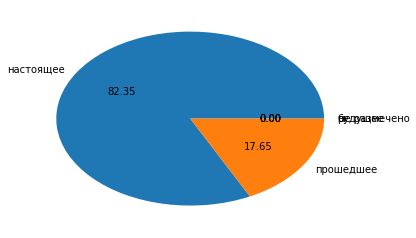

делать Counter({'present': 15, 'past': 11, 'fut': 10})


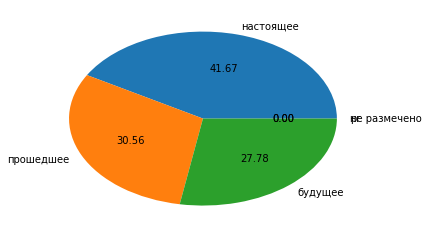

обладать Counter({'present': 36, nan: 28, 'past': 25, 'fut': 22})


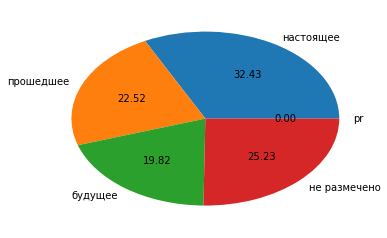

обладать абс Counter({nan: 11, 'present': 8, 'past': 4, 'fut': 3})


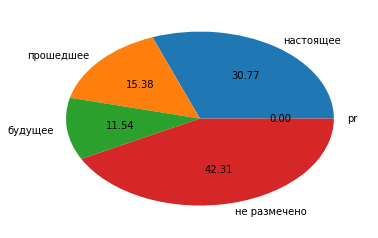

понимать Counter({'present': 54, 'past': 15, 'fut': 3, nan: 1})


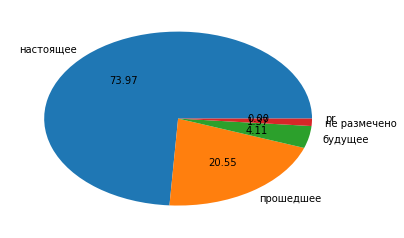

пр Counter({'present': 7, 'past': 4, 'fut': 4, nan: 1})


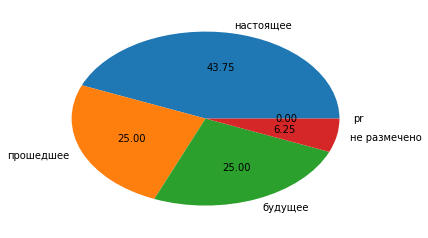

стоить Counter({'present': 3})


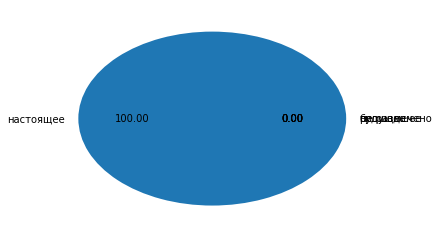

чёрт его знает Counter({nan: 9, 'present': 5, 'past': 4, 'pr': 1})


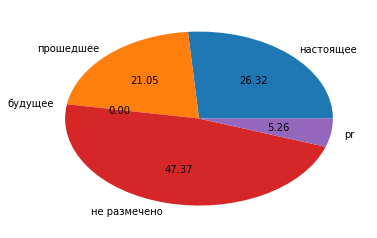

In [35]:
# Галка, [27 Apr 2017, 16:20]:
# 5. посчитать частотность различных грамматических форм внутри каждой группы и всего по выборке - число, лицо, время и форма предиката
#   1. Собираем формы по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
tense_values = data['tense'].unique()
tense_value_names = ["настоящее", "прошедшее", "будущее", "не размечено", "pr"]

tense_counter_across_all_types = Counter(data['tense'])
print(tense_counter_across_all_types)
for t in semantic_types:
    tense_counter = Counter(data[data['semantics+_']==t]['tense'])
#         Если tense == fut:
#           значение fut этого листа += 1
#           значение fut в общем += 1
#         Если tense == present:
#           значение present этого листа += 1
#           значение present в общем += 1
#         Если tense == past:
#           значение past этого листа += 1
#           значение past в общем += 1
    print(t, tense_counter)
    plt.pie([tense_counter[tense] for tense in tense_values], labels=tense_value_names, autopct='%.2f')
    plt.show()


#         Если number == 1:
#           значение sing этого листа += 1
#           значение sing в общем += 1
#         Если number == 2:
#           значение plur этого листа += 1
#           значение plur в общем += 1

#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       Для каждой грамматической характеристики (лицо, число, время и форма)
#       процент этого значения этой характеристики = значение этой характеристики/общее число примеров в этой сем. группе*100%
#   3. Рисуем pie chart для каждой характеристики с соответствующими процентами, легендой

[ 0.  3.  1.  2.] ['не размечено', 'третье лицо', 'первое лицо', 'второе лицо']
Counter({3.0: 144, 0.0: 104, 1.0: 31, 2.0: 22})
воспринимать Counter({0.0: 11, 3.0: 3, 1.0: 3})


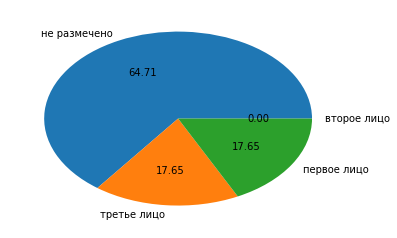

делать Counter({3.0: 30, 2.0: 4, 1.0: 2})


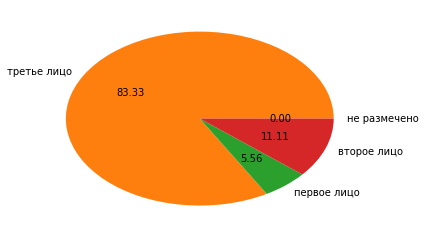

обладать Counter({0.0: 52, 3.0: 49, 1.0: 6, 2.0: 4})


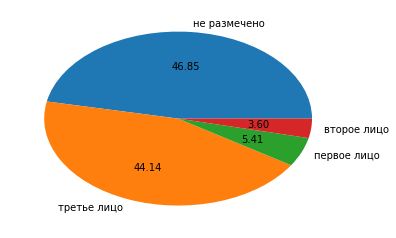

обладать абс Counter({0.0: 15, 3.0: 7, 2.0: 3, 1.0: 1})


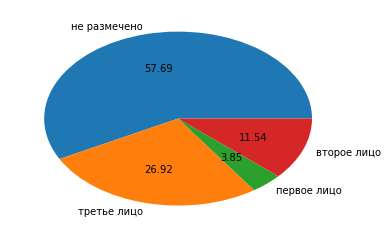

понимать Counter({3.0: 34, 1.0: 16, 0.0: 16, 2.0: 7})


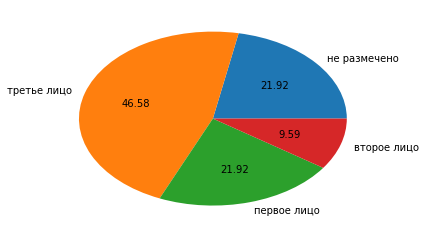

пр Counter({3.0: 10, 2.0: 3, 1.0: 2, 0.0: 1})


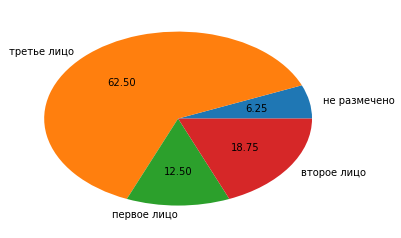

стоить Counter({3.0: 3})


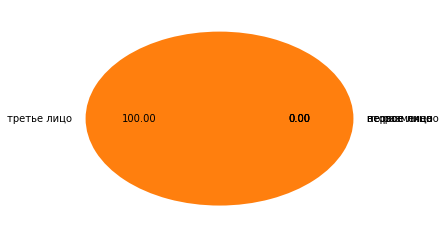

чёрт его знает Counter({0.0: 9, 3.0: 8, 2.0: 1, 1.0: 1})


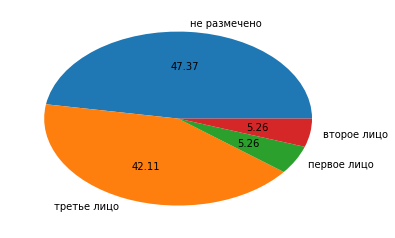

In [37]:
data['person_']= data['person'].fillna(0)

person_values = data['person_'].unique()
person_value_names = ["не размечено", "третье лицо", "первое лицо", "второе лицо"]


print(person_values, person_value_names)

person_counter_across_all_types = Counter(data['person_'])
print(person_counter_across_all_types)
for t in semantic_types:
    person_counter = Counter(data[data['semantics+_']==t]['person_'])

    print(t, person_counter)
    plt.pie([person_counter[p] for p in person_values], labels=person_value_names, autopct='%.2f')
    plt.show()


#         Если person == 1:
#           значение 1p этого листа += 1
#           значение 1p в общем += 1
#         Если person == 2:
#           значение 2p этого листа += 1
#           значение 2p в общем += 1
#         Если person == 3:
#           значение 3p этого листа += 1
#           значение 3p в общем += 1


['adverb' 0 'm' 'n' 'particip' 'inf' 'fem' 'transgress' 'imp' 'f'] ['наречие', '0', 'm', 'n', 'particip', 'inf', 'fem', 'transgress', 'imp', 'f']
Counter({0: 235, 'm': 19, 'adverb': 12, 'n': 12, 'inf': 11, 'fem': 6, 'transgress': 3, 'particip': 1, 'imp': 1, 'f': 1})
воспринимать Counter({'adverb': 8, 0: 6, 'm': 3})


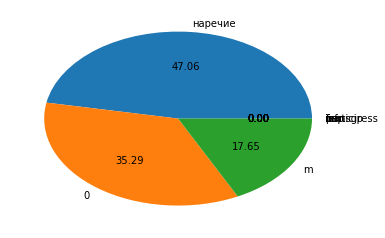

делать Counter({0: 32, 'n': 2, 'm': 2})


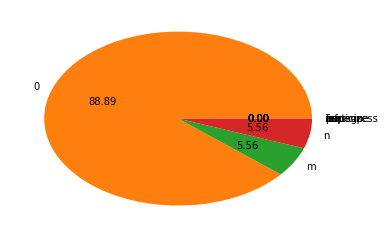

обладать Counter({0: 91, 'n': 6, 'm': 4, 'inf': 3, 'fem': 3, 'adverb': 2, 'particip': 1, 'transgress': 1})


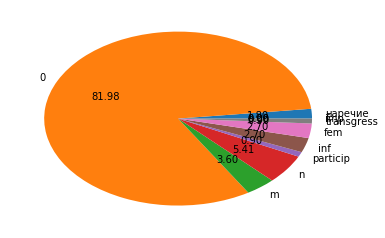

обладать абс Counter({0: 20, 'n': 3, 'inf': 1, 'fem': 1, 'adverb': 1})


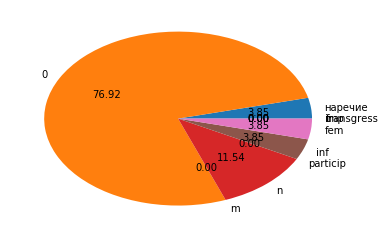

понимать Counter({0: 59, 'm': 8, 'inf': 3, 'fem': 2, 'transgress': 1})


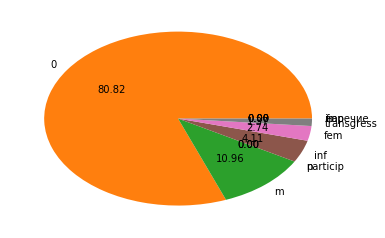

пр Counter({0: 14, 'm': 1, 'inf': 1})


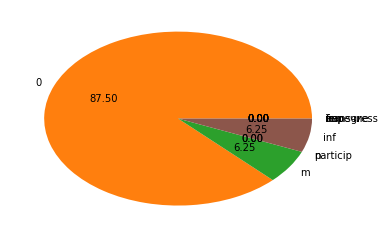

стоить Counter({'inf': 3})


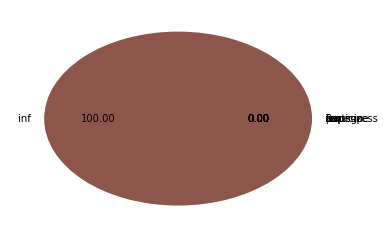

чёрт его знает Counter({0: 13, 'm': 1, 'n': 1, 'imp': 1, 'transgress': 1, 'adverb': 1, 'f': 1})


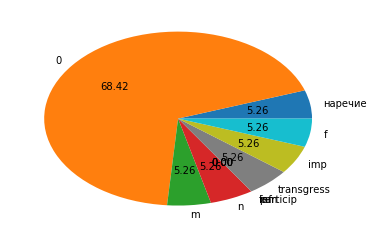

In [39]:

data['form_']= data['form'].fillna(0)

form_values = data['form_'].unique()
form_value_names = ["наречие", "0", 'm', 'n', 'particip', 'inf', 'fem', 'transgress', 'imp', 'f']


print(form_values, form_value_names)

form_counter_across_all_types = Counter(data['form_'])
print(form_counter_across_all_types)

for t in semantic_types:
    form_counter = Counter(data[data['semantics+_']==t]['form_'])

    print(t, form_counter)
    plt.pie([form_counter[f] for f in form_values], labels=form_value_names, autopct='%.2f')
    plt.show()



#         Если такая форма есть в списке форм этого листа:
#           значение формы += 1
#           значение формы в общем списке дат += 1
#         Если такой даты нет в списке дат этого листа:
#           добавить форму в список, приравняв её значение 1
#           Если такой формы нет в общем списке форм:
#             добавить форму в список, приравняв её значение 1

In [ ]:
# TODO:
## [ ] почистить все используемые колонки, избавиться от NaN, представить года как Int или строки,
## [ ] сделать более читаемые легенды
## [ ] использовать subplot
## [ ] унифицировать составление словарей и piecharts.
## [ ] удалить весь мертвый код кроме работающих альтернативных подходов
## [ ] написать ко всему пояснения

## [x] Добавить ещё картинок в последней секции
## [x] унифицировать цвета
## [x] добавить везде сглаженные графики

## Начиная с комментариев на английском становится непонятно.